# Implementing the Perceptron Algorithm

A _perceptron_ is the most basic single-layer neural network, used for binary classification. In this example, we will look at the _unit step function_ to understand how the perceptron classifies, and the _update rule_ that is used to learn. Finally, we'll plot the _decision boundary_ for our data, which is the line that our perceptron has decided is the best fit to cleanly separate the two classes. 

In [1]:
from sklearn import datasets

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

First, we need some data to classify. We want two clusters of random points (because a perceptron can only make a binary choice). We'll use the _make_blobs()_ function of the scikit-learn toolkit, which takes the following parameters:

- n_samples is the total number of points to generate, which will be evenly divded among the clusters. (You can play with changing this number to see what happens)
- n_features is the number of features for each sample (must be 2 or the perceptron won't work)
- centers is the number of centers to generate. A center is exactly what it sounds like: the center of a cluster, around which all the other points will be generated.
- cluster_std is the standard deviation of the clusters (affects how "spread out" the points are in each cluster)
- optionally, we could add a random_state parameter with a fixed value (e.g., random_state=42) so that we get the same set of points each time the notebook runs.

In [4]:
samples, labels = datasets.make_blobs( n_samples=300, n_features=2, 
                                       centers=2, cluster_std=1,
                                       random_state=1950)

What we get back from the _make_blobs()_ function are two arrays: 
- _samples[]_ is an array of the generated samples. Each sample has an x-coordinate and a y-coordinate.
- _labels[]_ is an array of labels for the generated samples. Each value is either 0 or 1 depending on which cluster the point belongs to.

Let's look at their shapes. _samples_ has shape (n_samples, 2) because it is a set of points, and each point has two values <x,y> so it's a 2D tensor. _labels_ has shape (300,) because it is just an array of values (it's a 1D tensor). If we look at the first few values of _labels_ we can see that the 0s and 1s are mixed (in other words, our data set isn't all the 0s followed by all the 1s, or vice versa).

In [5]:
print(samples.shape)

(300, 2)


In [6]:
print(labels.shape)

s = ""
for i in range(20):
    s = s + str(labels[i]) + " "
print(s)

(300,)
1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 


Now we can call matplotlib's pyplot library to draw a quick figure showing the locations of all our points. 

Each element of _samples_ has an x-coordinate and a y-coordinate; we pull those out by slicing _samples[:, 0]_ to get the x-coordinate and _samples[:, 1]_ to get the y-coordinate. 

We use "r^" (which is a formatting code to make a red triangle) to indicate the first class of points (labeled 0) and "bs" (a formatting code to make a blue square) to indicate the second class (labeled 1). 

[]

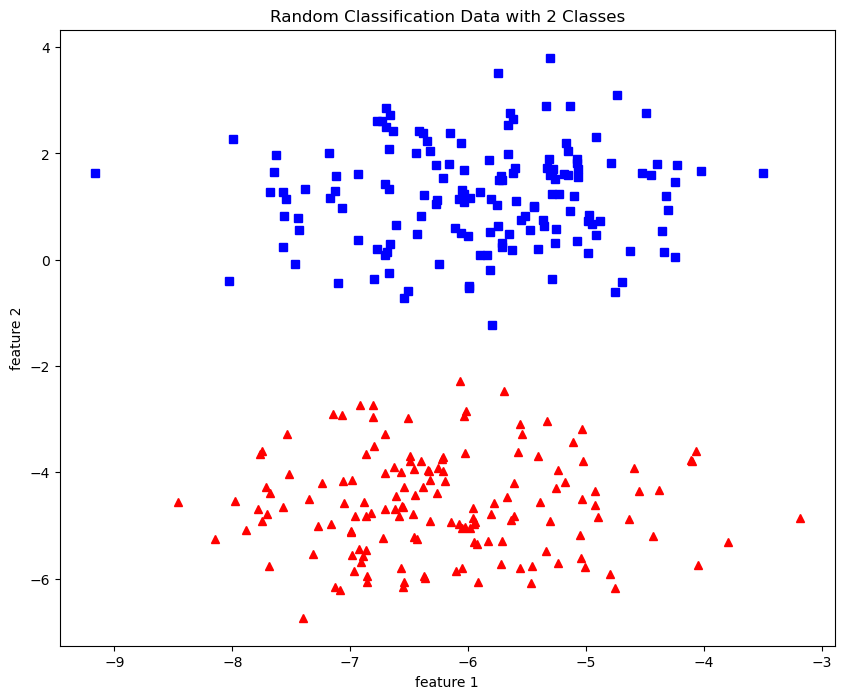

In [7]:
fig = plt.figure(figsize=(10,8))

plt.plot(samples[:, 0][labels == 0], samples[:, 1][labels == 0], "r^")
plt.plot(samples[:, 0][labels == 1], samples[:, 1][labels == 1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Random Classification Data with 2 Classes")
plt.plot()

The plot clearly shows the two clusters / classes, and our job is to separate them. (The perceptron's job is to learn a set of parameters, which will converge to the optimal straight line [actually a hyperplane, but projected in 2D space, it's a line] that separates the two classes.)

To implement a perceptron, we must:
- Receive the inputs
- Apply a linear transformation to the inputs, weights, and current theta
- Produce an output based on the activation function
- Update the value of theta if the output was incorrect

We will use the _unit step function_ for our activation function. If the output of the linear transform is 0 or less, we output 0; if the output of the linear transform is greater than zero, we output 1. What "learning" represents is thus a gradual adjusting of the separation line until all the points in the 1 cluster are on the "plus" side of the line and all the points in the 0 cluster are on the "minus" side of the line.

In [8]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [9]:
def perceptron(samples, labels, lr, epochs):
    # samples = inputs (x,y coordinates of each point)
    # labels = labels (0 or 1 class of each point)
    # lr = learning rate
    # epochs = number of iterations
    # m = number of training examples
    # n = number of features
    m, n = samples.shape
    
    theta = np.zeros((n+1, 1))
    
    # Empty list to store how many examples were misclassified at every iteration
    n_miss_list = []
    
    for epoch in range(epochs):
        # variable to store number misclassified
        n_miss = 0
        
        # loop over each example
        for idx, sample in enumerate(samples):
            
            sample = np.insert(sample, 0, 1).reshape(-1, 1)
            
            # calculate prediction
            y_hat = step_func(np.dot(sample.T, theta))
            
            # update if the example was misclassified
            if (np.squeeze(y_hat) - labels[idx]) != 0:
                theta += lr * ((labels[idx] - y_hat) * sample)
                
                # that was a miss, so increment the counter
                n_miss += 1
            
            n_miss_list.append(n_miss)
        
        return theta, n_miss_list

In [10]:
def plot_decision_boundary(samples, labels, theta):
    # samples = inputs
    # theta = parameters
    
    x1 = [min(samples[:,0]), max(samples[:,0])]
    m = -theta[1] / theta[2]
    b = -theta[0] / theta[2]
    x2 = m * x1 + b
    
    # Plotting
    fig = plt.figure(figsize = (10,8))
    plt.plot(samples[:, 0][labels == 0], samples[:, 1][labels == 0], "r^")
    plt.plot(samples[:, 0][labels == 1], samples[:, 1][labels == 1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    
    plt.plot(x1, x2, "y-")

In [11]:
theta, miss_list = perceptron(samples, labels, 0.1, 100)

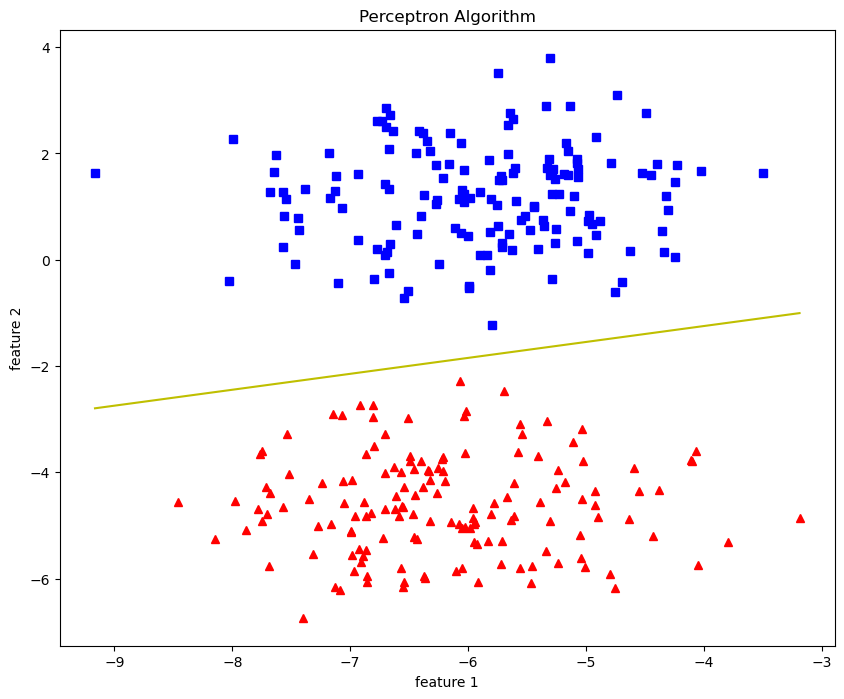

In [12]:
plot_decision_boundary(samples, labels, theta)

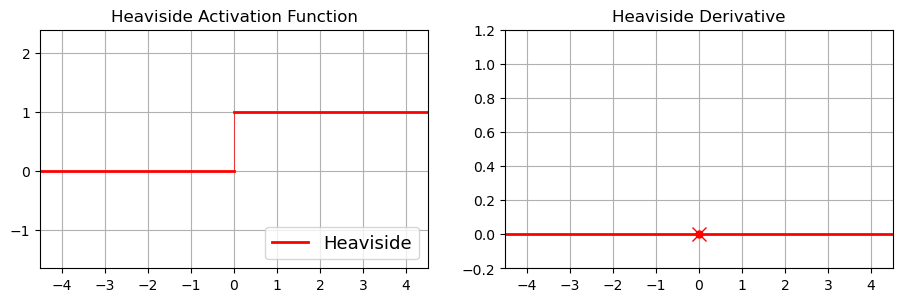

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.grid(True)
plt.title("Heaviside Activation Function")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.grid(True)
plt.title("Heaviside Derivative")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

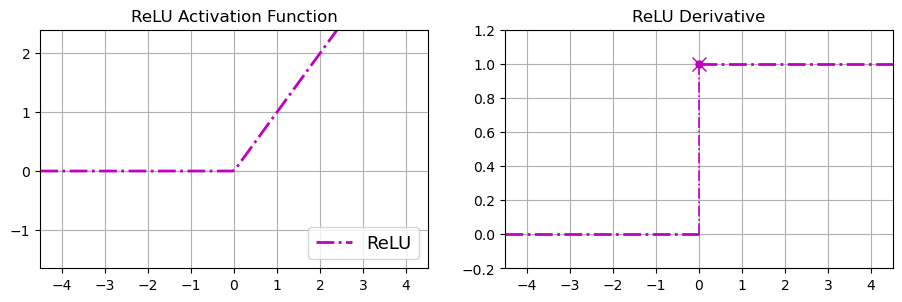

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("ReLU Activation Function")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("ReLU Derivative")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

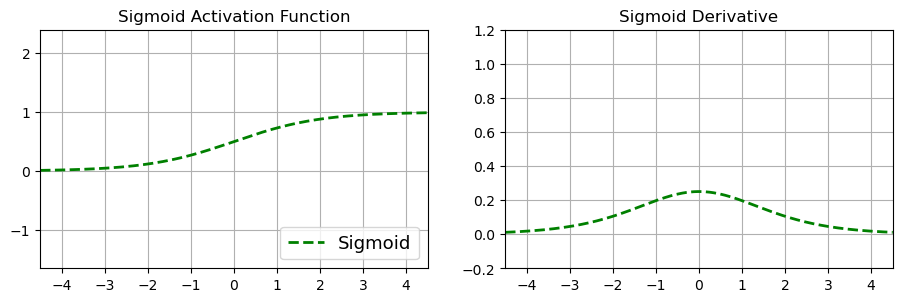

In [15]:
from scipy.special import expit as sigmoid
import numpy as np
import matplotlib.pyplot as plt

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.grid(True)
plt.title("Sigmoid Activation Function")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.grid(True)
plt.title("Sigmoid Derivative")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

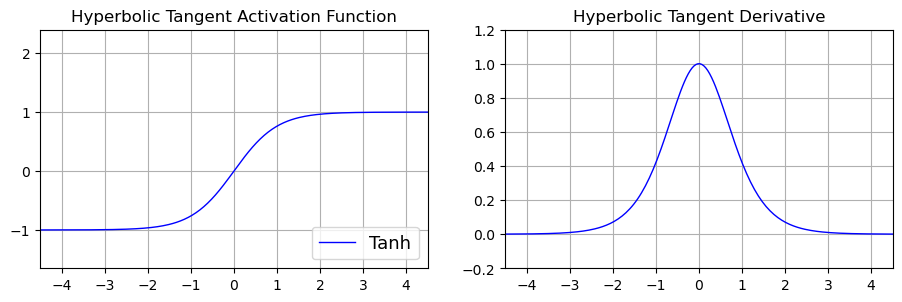

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Hyperbolic Tangent Activation Function")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Hyperbolic Tangent Derivative")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

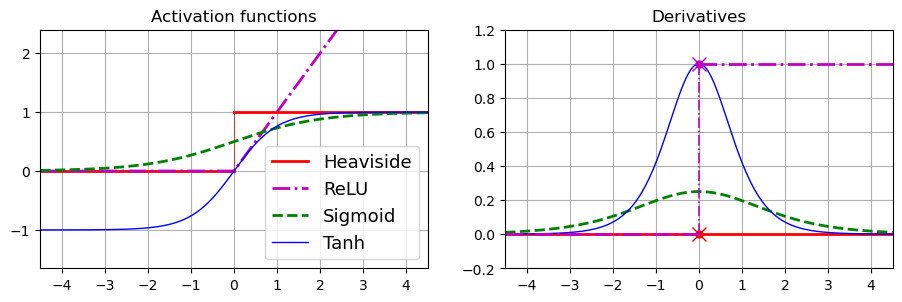

In [17]:
from scipy.special import expit as sigmoid
import numpy as np
import matplotlib.pyplot as plt

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()